In [1]:
import os
from scipy.io import wavfile
import librosa
import pywt
import matplotlib.pyplot as plt
import numpy as np

In [4]:
seed = 12
np.random.seed(seed)

path = "../input/gtzan-dataset-music-genre-classification/"

path_audio_files = os.getcwd()+ "/Data/genres_original/"

hop_length = 512

n_fft = 2048

genre_dict = {"blues": 0,
              "classical": 1,
              "country": 2,
              "disco": 3,
              "hiphop": 4,
              "jazz": 5,
              "metal": 6,
              "pop": 7,
              "reggae": 8,
              "rock": 9}

# Show Audio Information

## wave

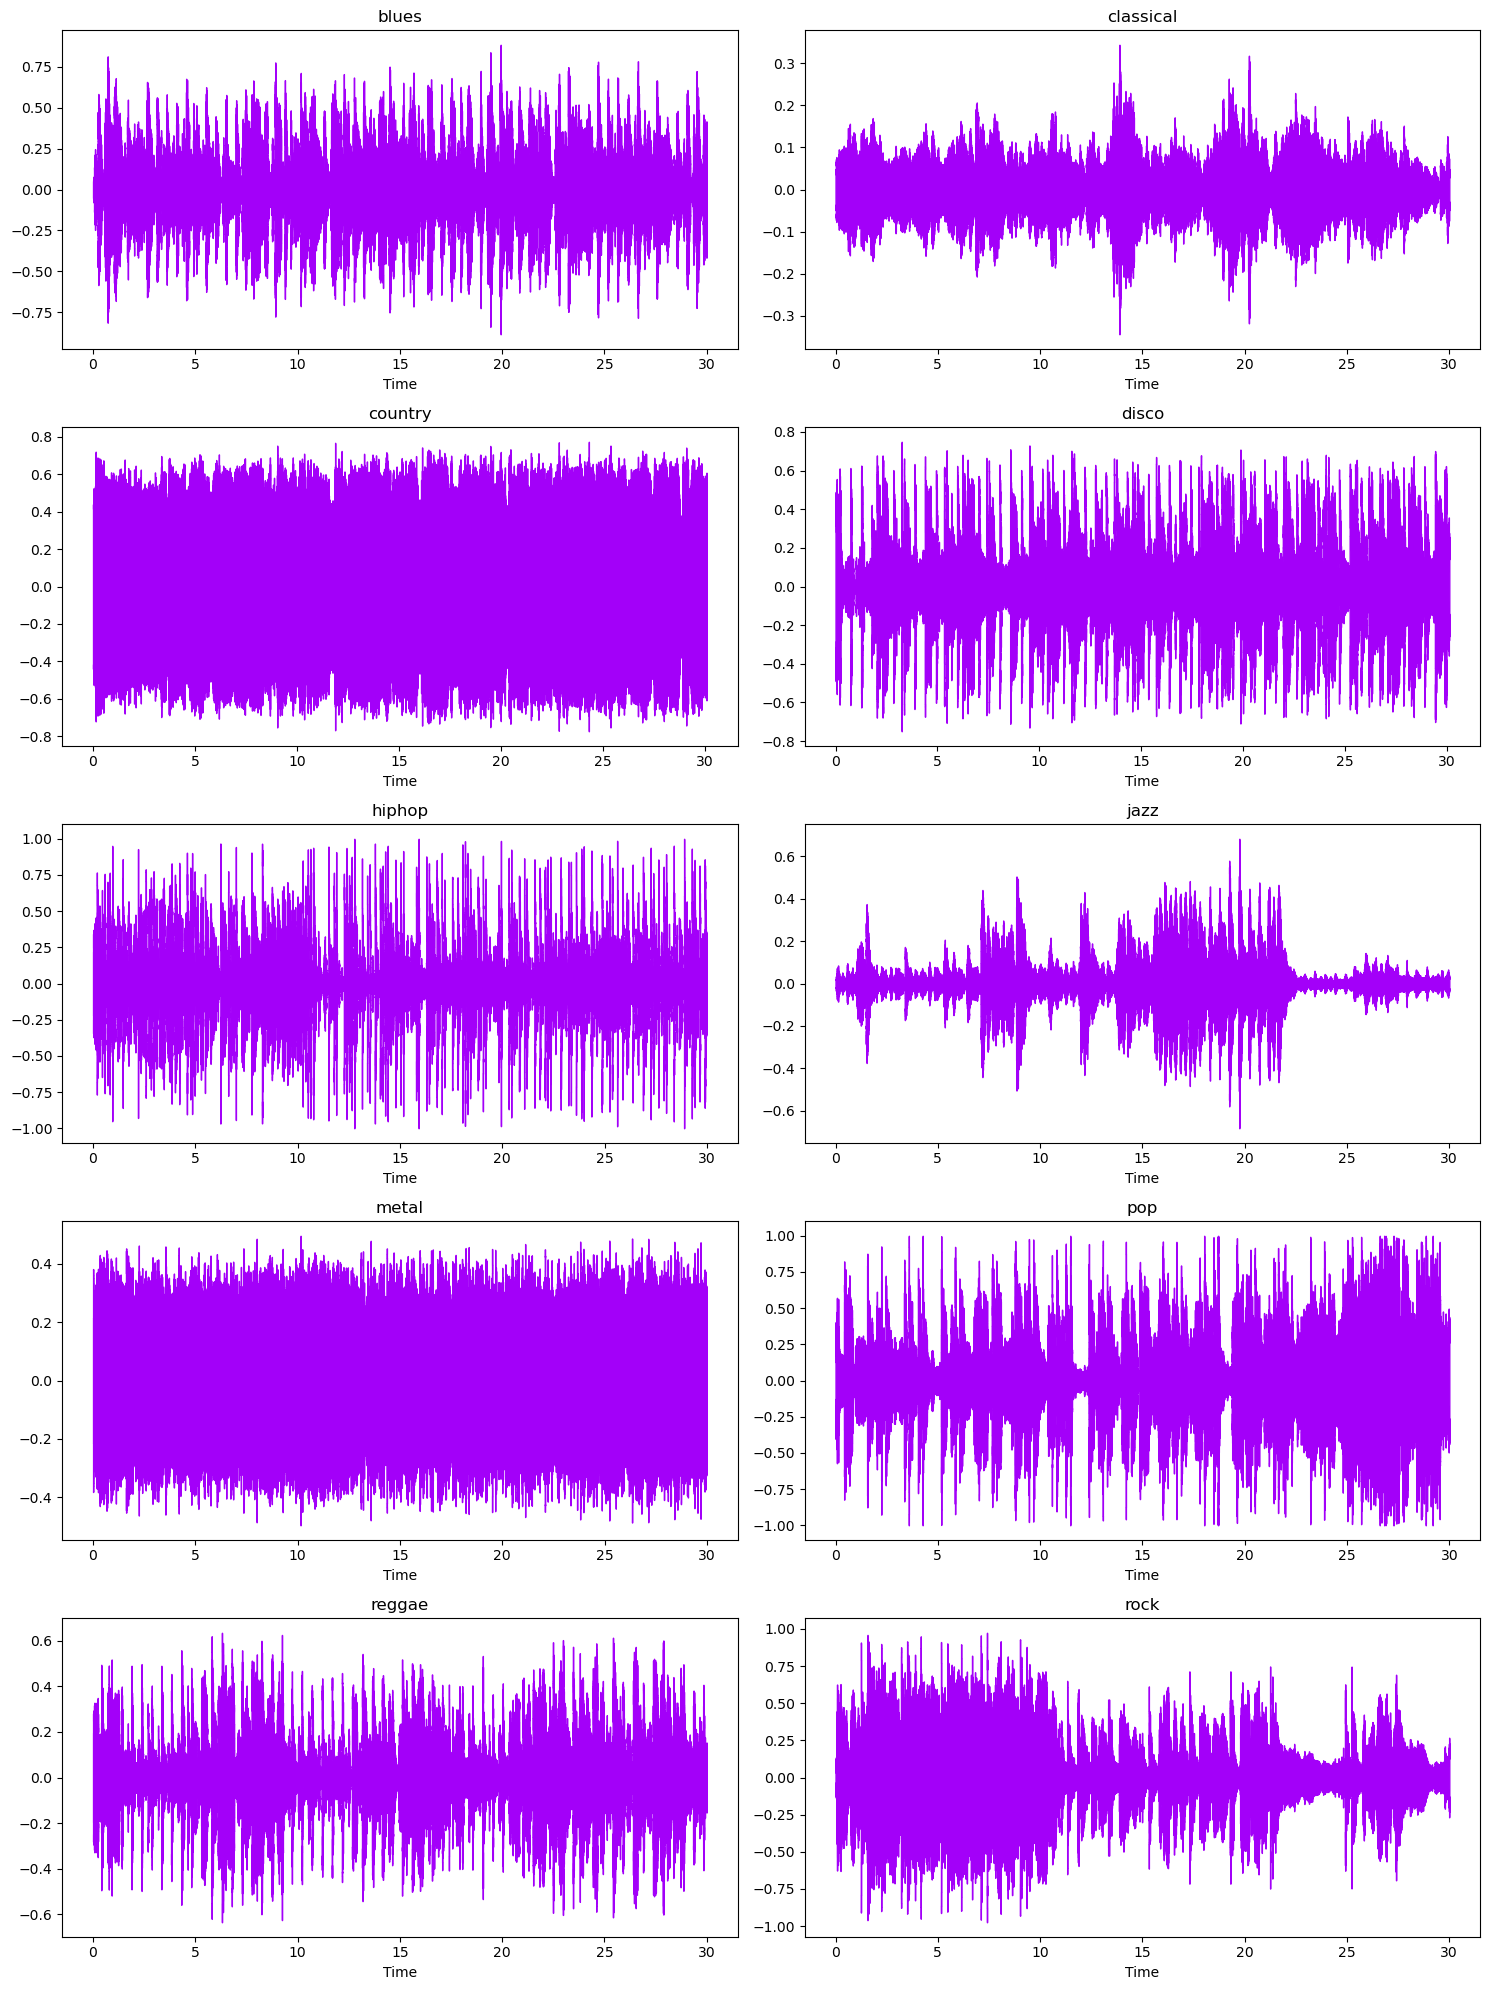

In [15]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
i = 0
j = 0
for genre in genre_dict.keys():
    # Reading the first audio file
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    
    librosa.display.waveshow(y = data, sr = sampling_rate, color = "#A300F9",ax=axes[i][j])
 

    axes[i][j].set_title(genre)

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

## zero crossing rate

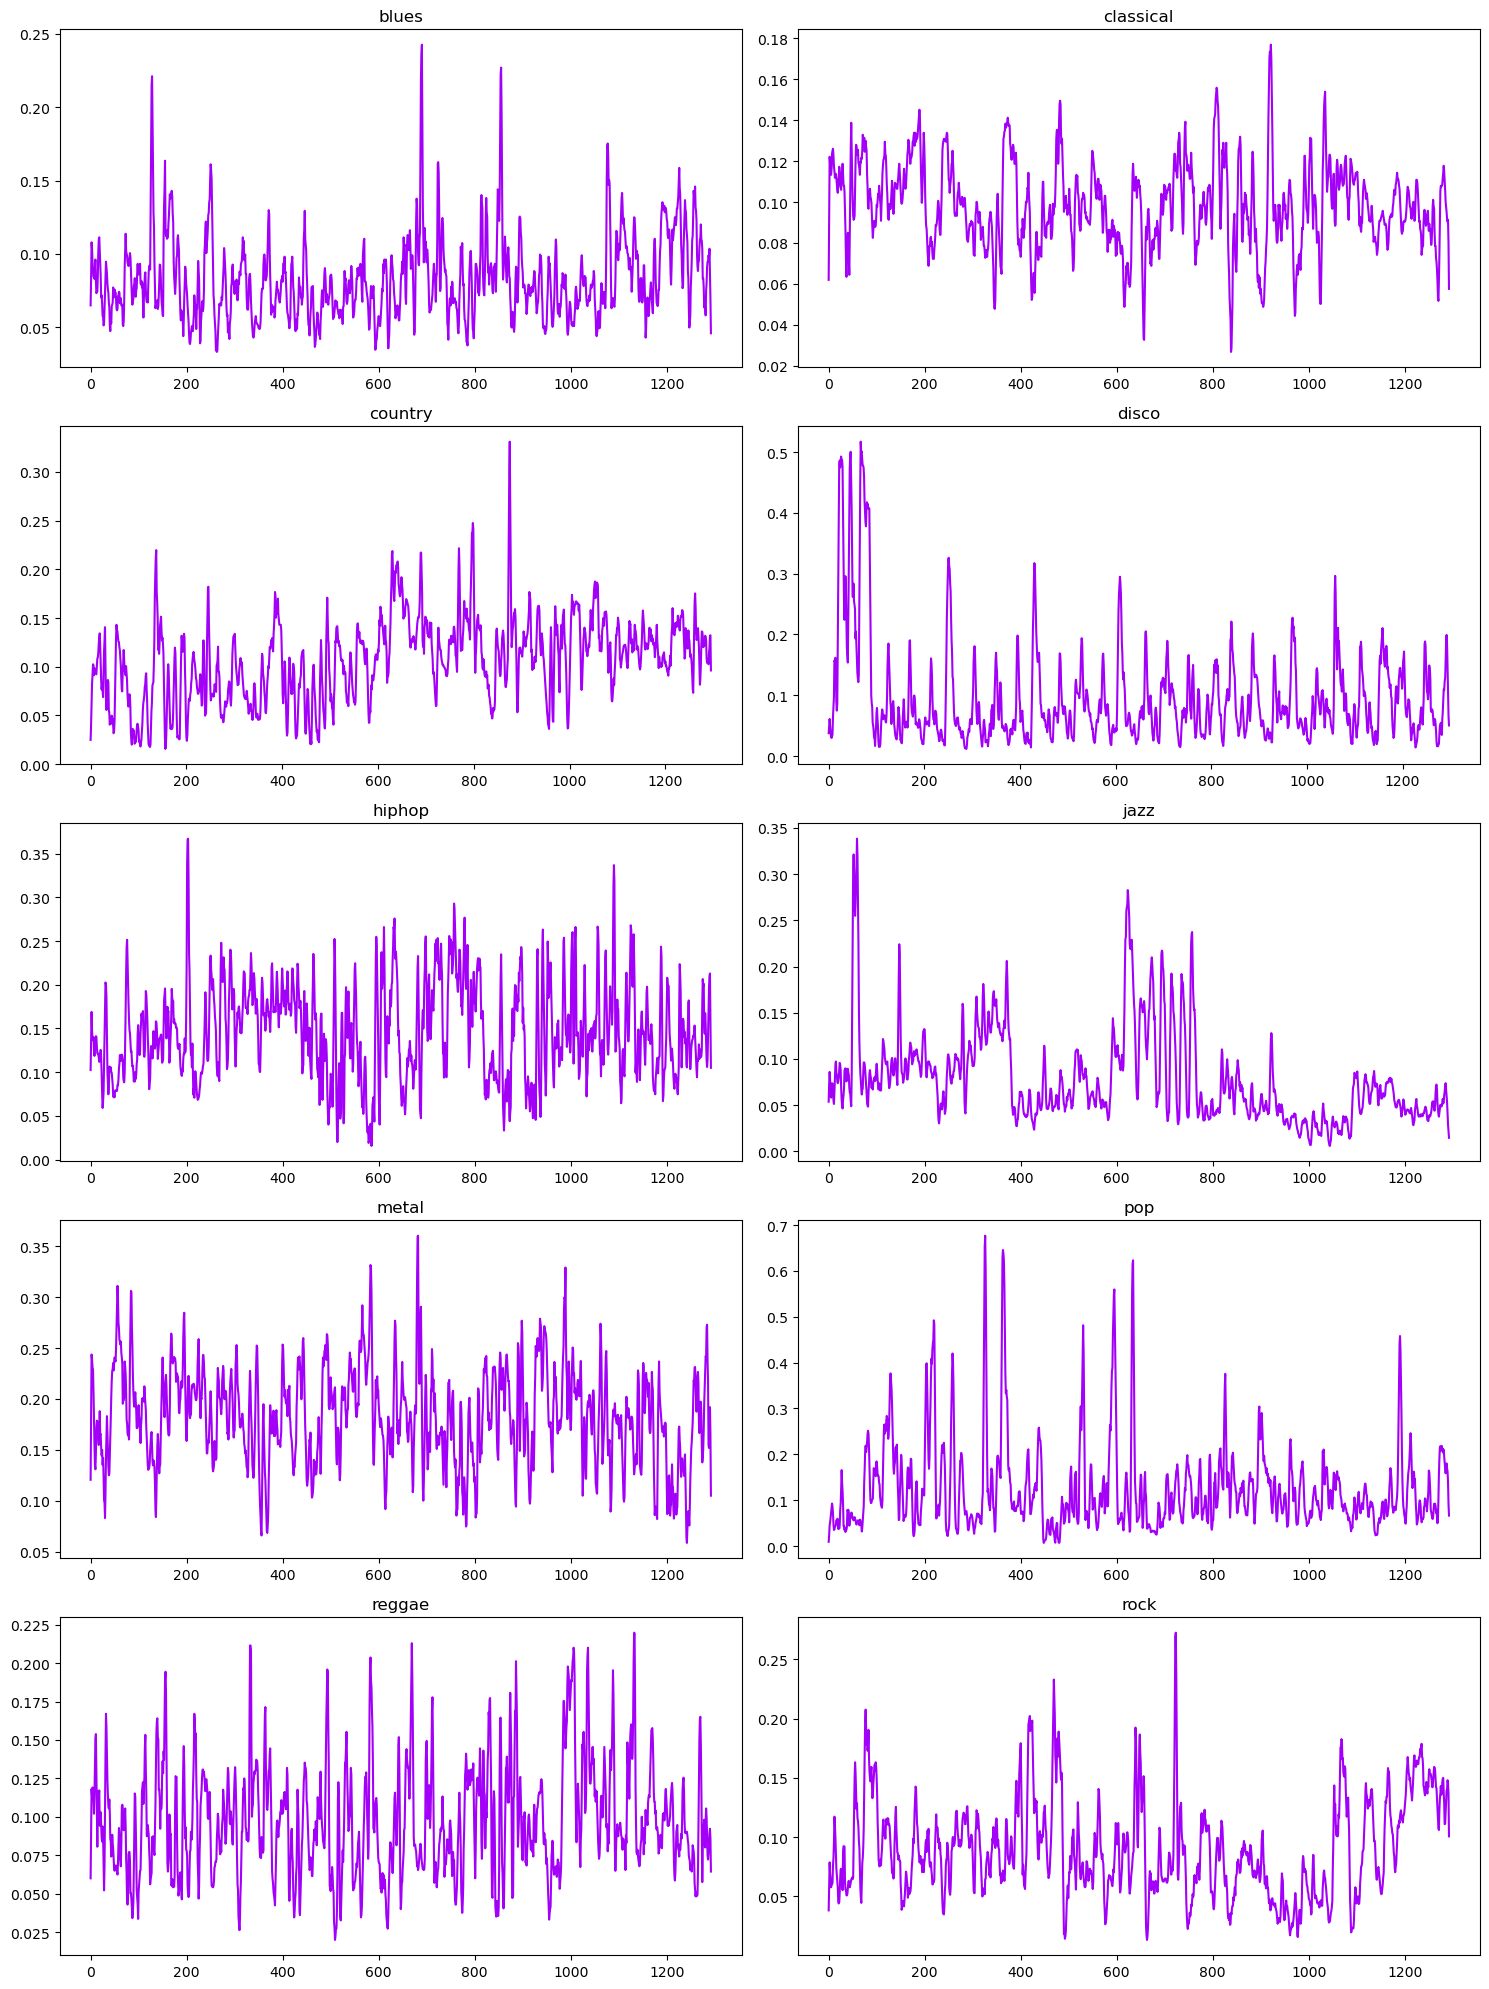

In [14]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
i = 0
j = 0
for genre in genre_dict.keys():
    
    # Reading the first audio file
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data,hop_length = hop_length)[0]
    
    axes[i][j].plot(zero_crossing_rate,color = "#A300F9")
 
    axes[i][j].set_title(genre)

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

## mel spectrogram

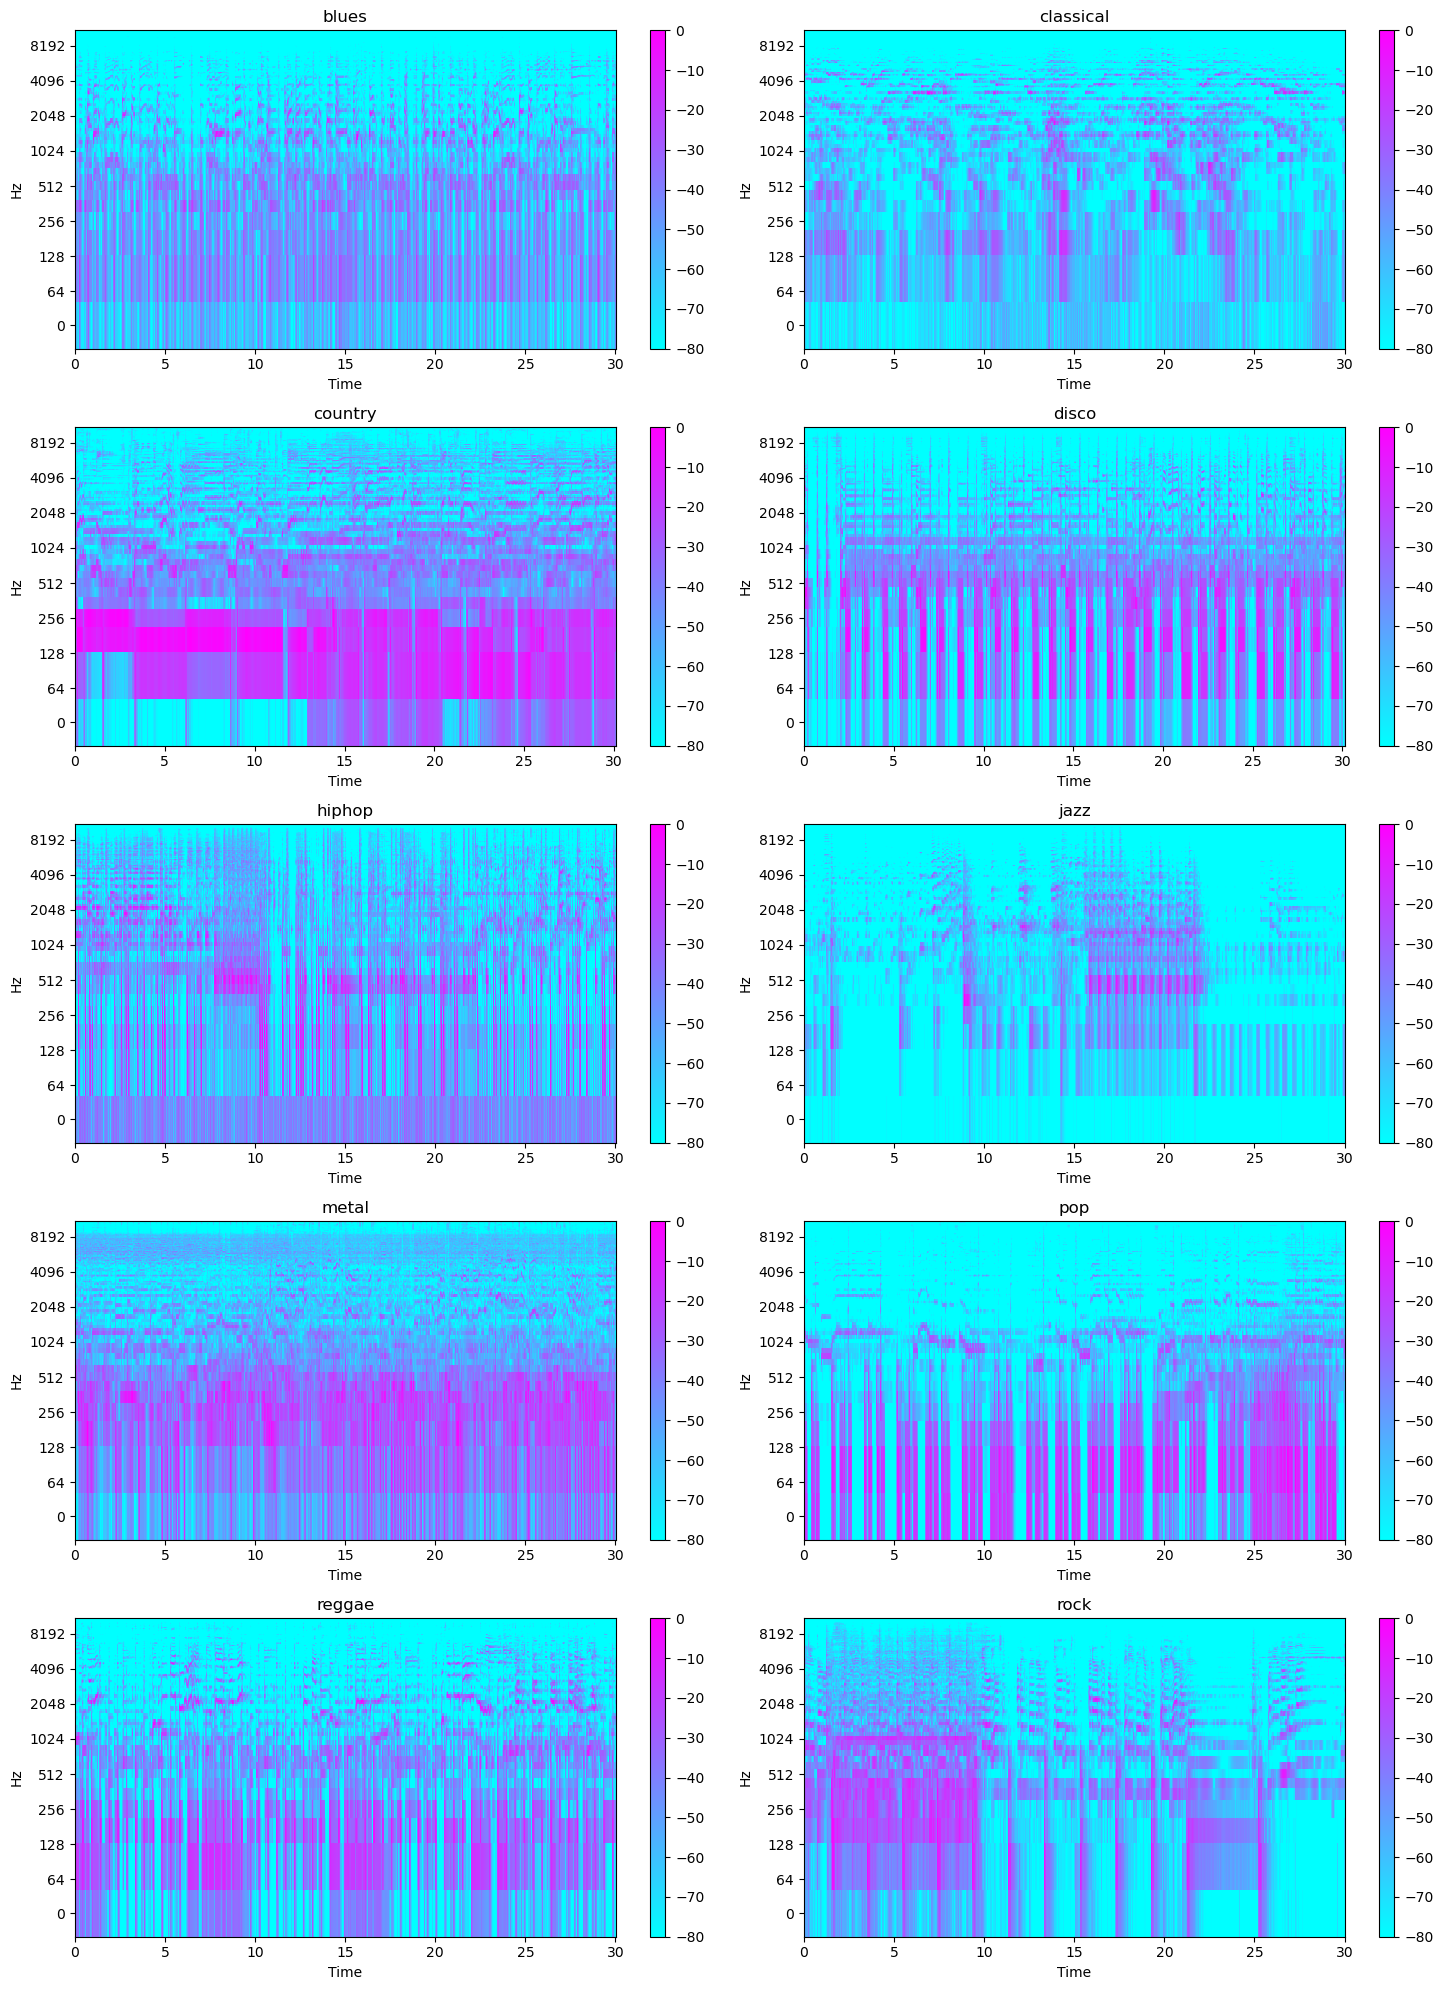

In [17]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
i = 0
j = 0
for genre in genre_dict.keys():
    # Reading the first audio file
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sampling_rate,hop_length = hop_length)
    
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

    img = librosa.display.specshow(mel_spec_db, sr = sampling_rate, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool',ax=axes[i][j])
    fig.colorbar(img, ax=axes[i][j])
    
    axes[i][j].set_title(genre)

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

## mfcc

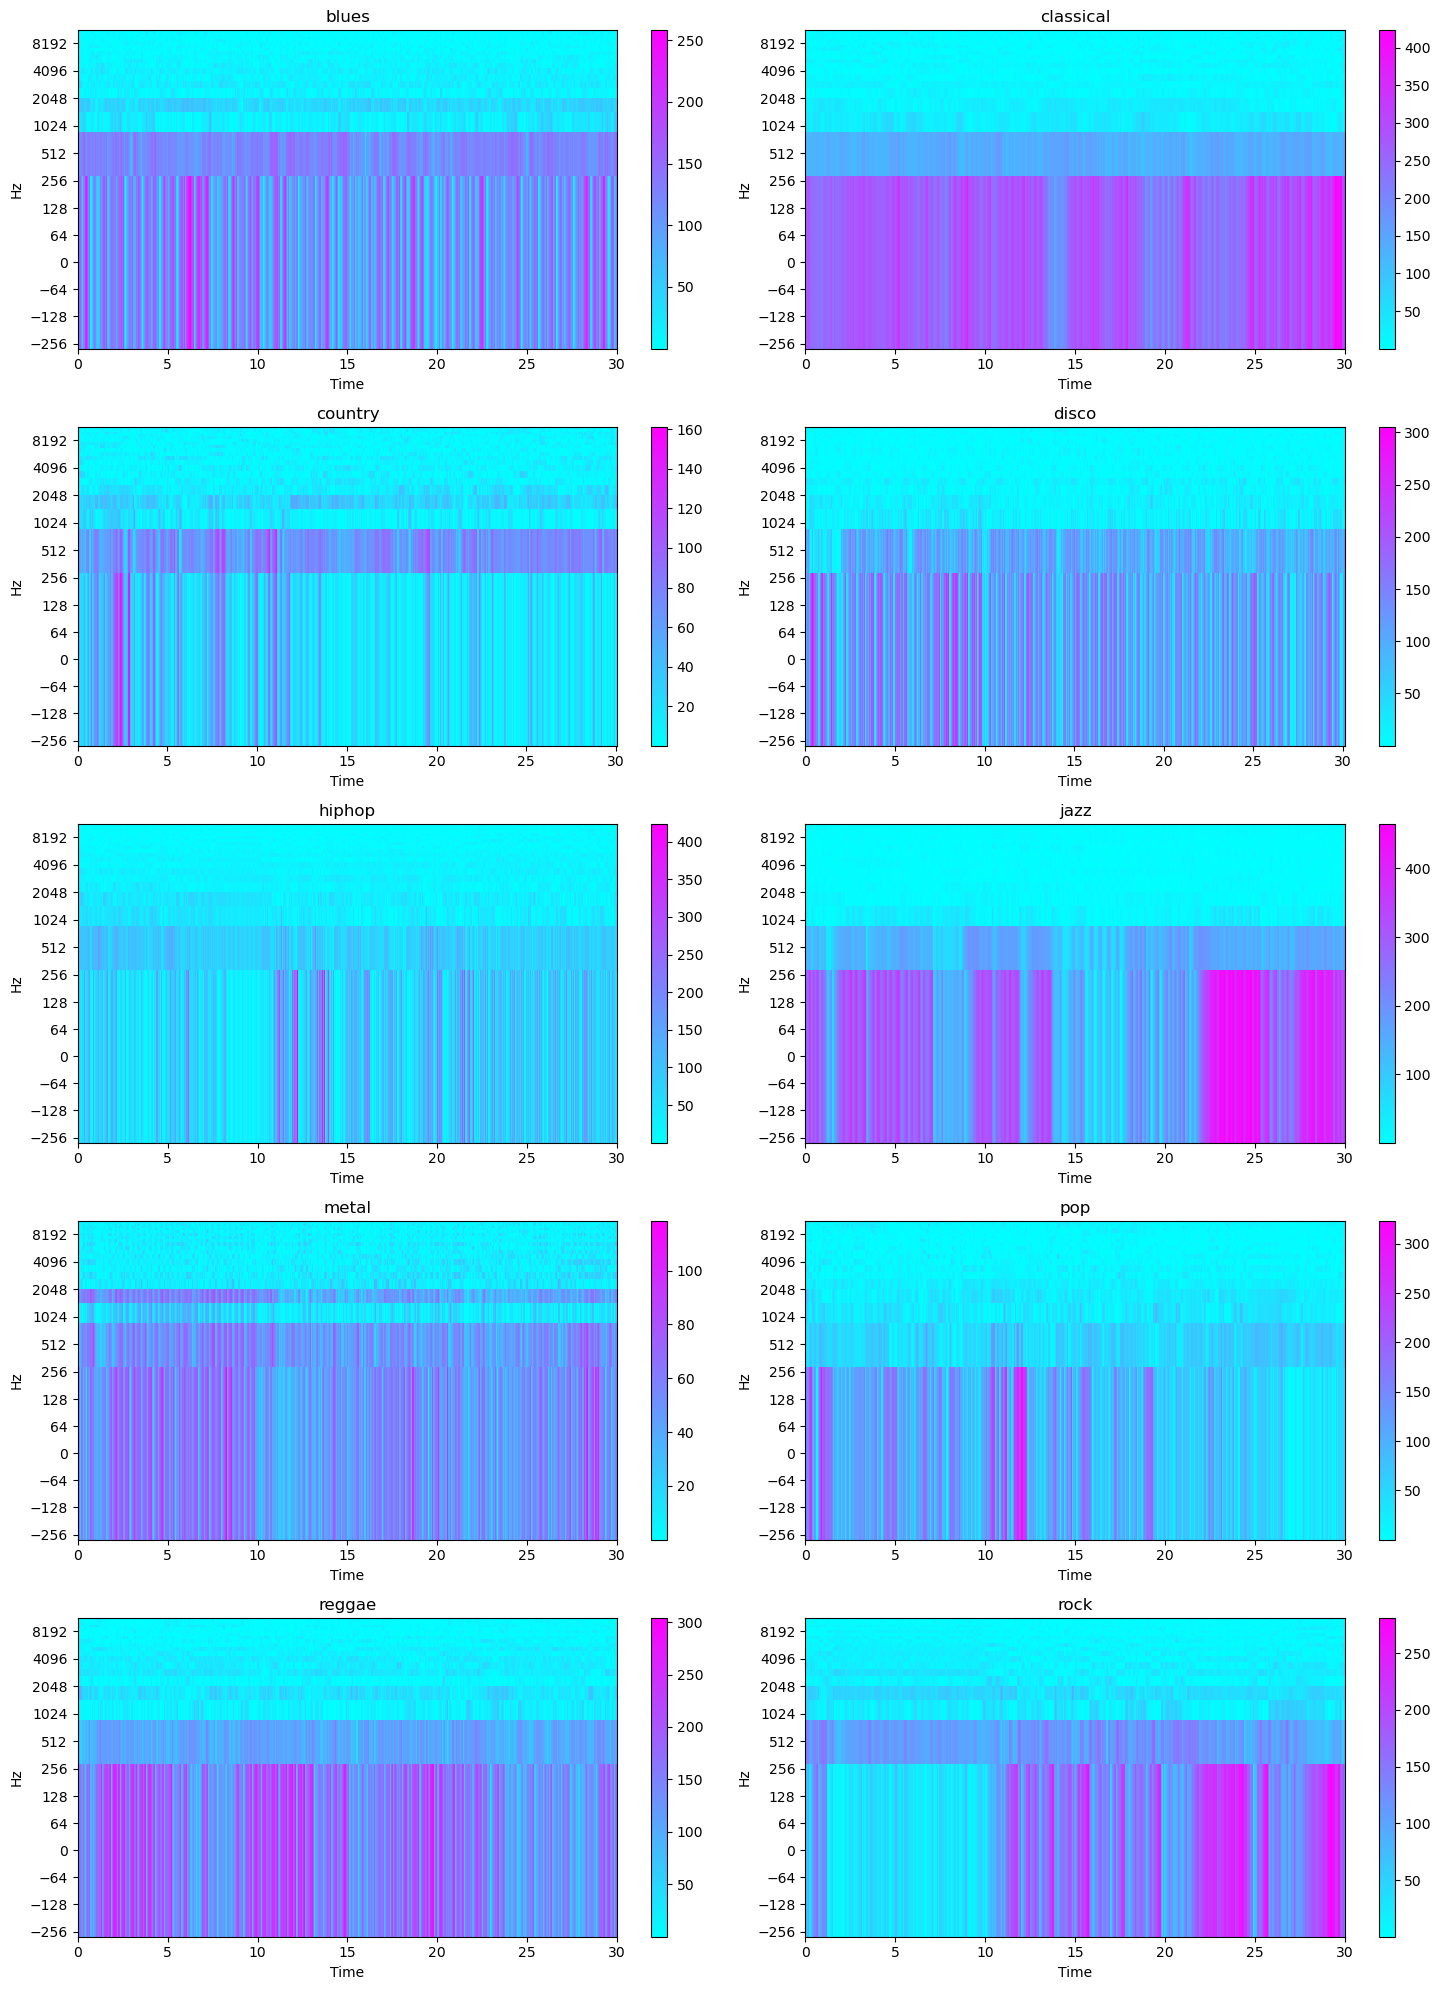

In [13]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
i = 0
j = 0
for genre in genre_dict.keys():
    # Reading the first audio file
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    
    mfcc_data = np.abs(librosa.feature.mfcc(y=data, sr = sampling_rate))
    
    img = librosa.display.specshow(mfcc_data, sr = sampling_rate, x_axis = 'time', y_axis = 'log',cmap = 'cool',ax=axes[i][j])
    fig.colorbar(img, ax=axes[i][j])
    
    axes[i][j].set_title(genre)

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

# Generate Image

## wave

In [ ]:
path_audio_files = os.getcwd()+ "/Data/genres_original/"

In [35]:
wave_img_files = os.getcwd()+ "/Data/wave_images/"

for genre in genre_dict.keys():
    # Reading audio files for each genre
    if genre in ['blues', 'classical', 'country', 'disco', 'hiphop']:
        continue
    os.makedirs(wave_img_files + genre, exist_ok = True)
    for filename in os.listdir(path_audio_files + genre):
        if filename == 'jazz.00054.wav':
            continue
        audio_name = filename[:-4]
        data,sampling_rate = librosa.load(path_audio_files + genre + "/" + filename)
        plt.figure(figsize=(5, 3))
        librosa.display.waveshow(y = data, sr = sampling_rate, color = "#A300F9")
        plt.axis('off')
        plt.savefig(wave_img_files + genre + "/" + audio_name + '.png', bbox_inches='tight')
        plt.close()
    print('Finish processing', genre)


Finish processing jazz
Finish processing metal
Finish processing pop
Finish processing reggae
Finish processing rock


## zero crossing rate

In [39]:
wave_img_files = os.getcwd()+ "/Data/ZCR_images/"

for genre in genre_dict.keys():
    # Reading audio files for each genre
    # if genre in ['blues', 'classical', 'country', 'disco', 'hiphop']:
    #     continue
    os.makedirs(wave_img_files + genre, exist_ok = True)
    for filename in os.listdir(path_audio_files + genre):
        if filename == 'jazz.00054.wav':
            continue
        audio_name = filename[:-4]
        data,sampling_rate = librosa.load(path_audio_files + genre + "/" + filename)
        plt.figure(figsize=(5, 3))
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data,hop_length = hop_length)[0]
        plt.axis('off')
        plt.plot(zero_crossing_rate,color = "#A300F9")
        # plt.show()
        plt.savefig(wave_img_files + genre + "/" + audio_name + '.png', bbox_inches='tight')
        plt.close()
        # break
    print('Finish processing', genre)


Finish processing blues
Finish processing classical
Finish processing country
Finish processing disco
Finish processing hiphop
Finish processing jazz
Finish processing metal
Finish processing pop
Finish processing reggae
Finish processing rock


## Mel Spectrogram

In [44]:
wave_img_files = os.getcwd()+ "/Data/spec_images/"

for genre in genre_dict.keys():
    # Reading audio files for each genre
    # if genre in ['blues', 'classical', 'country', 'disco', 'hiphop']:
    #     continue
    os.makedirs(wave_img_files + genre, exist_ok = True)
    for filename in os.listdir(path_audio_files + genre):
        if filename == 'jazz.00054.wav':
            continue
        audio_name = filename[:-4]
        data,sampling_rate = librosa.load(path_audio_files + genre + "/" + filename)
        plt.figure(figsize=(5, 3))
        mel_spec = librosa.feature.melspectrogram(y=data, sr=sampling_rate,hop_length = hop_length)
        mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
        librosa.display.specshow(mel_spec_db, sr = sampling_rate, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool')
        plt.axis('off')
        # plt.show()
        plt.savefig(wave_img_files + genre + "/" + audio_name + '.png', bbox_inches='tight')
        plt.close()
        # break
    print('Finish processing', genre)


Finish processing blues
Finish processing classical
Finish processing country
Finish processing disco
Finish processing hiphop
Finish processing jazz
Finish processing metal
Finish processing pop
Finish processing reggae
Finish processing rock


## mfcc

In [46]:
wave_img_files = os.getcwd()+ "/Data/mfcc_images/"

for genre in genre_dict.keys():
    # Reading audio files for each genre
    # if genre in ['blues', 'classical', 'country', 'disco', 'hiphop']:
    #     continue
    os.makedirs(wave_img_files + genre, exist_ok = True)
    for filename in os.listdir(path_audio_files + genre):
        if filename == 'jazz.00054.wav':
            continue
        audio_name = filename[:-4]
        data,sampling_rate = librosa.load(path_audio_files + genre + "/" + filename)
        plt.figure(figsize=(5, 3))
        mfcc_data = np.abs(librosa.feature.mfcc(y=data, sr = sampling_rate))
        librosa.display.specshow(mfcc_data, sr = sampling_rate, x_axis = 'time', y_axis = 'log',cmap = 'cool')
        plt.axis('off')
        # plt.show()
        plt.savefig(wave_img_files + genre + "/" + audio_name + '.png', bbox_inches='tight')
        plt.close()
        # break
    print('Finish processing', genre)


Finish processing blues
Finish processing classical
Finish processing country
Finish processing disco
Finish processing hiphop
Finish processing jazz
Finish processing metal
Finish processing pop
Finish processing reggae
Finish processing rock
